In [53]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("la_sales.sqlite")

***
# *PERFORMING EXPLORATORY DATA ANALYSIS*
***

In [54]:
sales_df = pd.read_csv("LA_Retail_Sales.csv")
sales_df

,store_id,store_name,product_category,date,Unit sales,DOLLAR SALES,store_zip,promotion_flag
0,LA002,Store_2,Household,9/1/24,16.0,96.28,90004,True
1,LA001,Store_1,Beverages,9/1/24,14.0,86.63,90004,True
2,LA004,Store_4,Produce,9/15/24,18.0,298.26,90003,True
3,LA003,Store_3,Household,9/7/24,7.0,25.69,90001,True
4,LA008,Store_8,Beverages,9/18/24,25.0,85.46,90005,False
...,...,...,...,...,...,...,...,...
745,LA010,Store_10,Beverages,9/24/24,46.0,790.99,90005,True
746,LA008,Store_8,Snacks,9/14/24,23.0,375.40,90003,False
747,LA004,Store_4,Personal Care,9/14/24,17.0,225.24,900XX,False
748,LA009,Store_9,Snacks,9/28/24,37.0,406.47,90004,False


In [55]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          750 non-null    object 
 1   store_name        750 non-null    object 
 2   product_category  750 non-null    object 
 3   date              750 non-null    object 
 4   Unit sales        745 non-null    float64
 5   DOLLAR SALES      743 non-null    float64
 6   store_zip         750 non-null    object 
 7   promotion_flag    750 non-null    bool   
dtypes: bool(1), float64(2), object(5)
memory usage: 41.9+ KB


In [56]:
sales_df.describe()

,Unit sales,DOLLAR SALES
count,745.000000,743.000000
mean,25.585235,279.496729
std,14.357514,217.190090
min,1.000000,5.330000
25%,13.000000,104.920000
50%,26.000000,224.690000
75%,38.000000,407.095000
max,50.000000,980.000000


***
# **TRANSFORMING THE DATA**
***

In [57]:
sales_df.columns.str.title().str.replace(" ", "_")

Index(['Store_Id', 'Store_Name', 'Product_Category', 'Date', 'Unit_Sales',
       'Dollar_Sales', 'Store_Zip', 'Promotion_Flag'],
      dtype='object')

In [58]:
# Assigning the transformed data to the data
sales_df = pd.read_csv("LA_Retail_Sales.csv")
sales_df.columns = sales_df.columns.str.title().str.replace(" ", "_")
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Store_Id          750 non-null    object 
 1   Store_Name        750 non-null    object 
 2   Product_Category  750 non-null    object 
 3   Date              750 non-null    object 
 4   Unit_Sales        745 non-null    float64
 5   Dollar_Sales      743 non-null    float64
 6   Store_Zip         750 non-null    object 
 7   Promotion_Flag    750 non-null    bool   
dtypes: bool(1), float64(2), object(5)
memory usage: 41.9+ KB


In [59]:
# Finding out the missing values in unit sales cos it has 745 instead of 750 entries.
sales_df.query("Unit_Sales.isna()")

,Store_Id,Store_Name,Product_Category,Date,Unit_Sales,Dollar_Sales,Store_Zip,Promotion_Flag
25,LA007,Store_7,Personal Care,9/16/24,NaN,245.89,90004,True
301,LA002,Store_2,Personal Care,9/21/24,NaN,8.47,90002,True
395,LA009,Store_9,household,9/7/24,NaN,18.06,90002,True
501,LA007,Store_7,Personal Care,9/28/24,NaN,60.13,90002,True
651,LA009,Store_9,Personal Care,9/23/24,NaN,305.32,90004,True


In [60]:
# Filling out the missing values by inputing 0
sales_df["Unit_Sales"] = sales_df["Unit_Sales"].fillna(0)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Store_Id          750 non-null    object 
 1   Store_Name        750 non-null    object 
 2   Product_Category  750 non-null    object 
 3   Date              750 non-null    object 
 4   Unit_Sales        750 non-null    float64
 5   Dollar_Sales      743 non-null    float64
 6   Store_Zip         750 non-null    object 
 7   Promotion_Flag    750 non-null    bool   
dtypes: bool(1), float64(2), object(5)
memory usage: 41.9+ KB


In [61]:
# Finding out the missing values in dollar sales cos it has 743 instead of 750 entries.
sales_df.query("Dollar_Sales.isna()")

,Store_Id,Store_Name,Product_Category,Date,Unit_Sales,Dollar_Sales,Store_Zip,Promotion_Flag
256,LA002,Store_2,Beverages,9/21/24,6.0,NaN,90002,False
282,LA003,Store_3,Personal Care,9/21/24,26.0,NaN,90002,True
326,LA001,Store_1,Personal Care,9/30/24,2.0,NaN,90003,False
474,LA009,Store_9,Beverages,9/25/24,6.0,NaN,900XX,True
482,LA009,Store_9,Household,9/13/24,36.0,NaN,90001,True
515,LA003,Store_3,Household,9/12/24,31.0,NaN,90004,False
642,LA010,Store_10,Snacks,9/25/24,34.0,NaN,90001,True


In [62]:
# Filling out the missing values by inputing 0
sales_df["Dollar_Sales"] = sales_df["Dollar_Sales"].fillna(0)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Store_Id          750 non-null    object 
 1   Store_Name        750 non-null    object 
 2   Product_Category  750 non-null    object 
 3   Date              750 non-null    object 
 4   Unit_Sales        750 non-null    float64
 5   Dollar_Sales      750 non-null    float64
 6   Store_Zip         750 non-null    object 
 7   Promotion_Flag    750 non-null    bool   
dtypes: bool(1), float64(2), object(5)
memory usage: 41.9+ KB


In [63]:
# Exploring more data columns for possible dirtiness.
sales_df.Store_Zip.value_counts()

Store_Zip
90003    138
90004    136
90001    126
90005    122
900XX    119
90002    109
Name: count, dtype: int64

In [64]:
# Assuming I knew that every value with 'XX' is '00' after investigating on why the zip code is in that format
sales_df["Store_Zip"] = sales_df["Store_Zip"].str.replace('XX', '00')
sales_df.Store_Zip.value_counts()

Store_Zip
90003    138
90004    136
90001    126
90005    122
90000    119
90002    109
Name: count, dtype: int64

In [65]:
# Changing data type for some columns to aid my analysis. Date should be datatime format and unit sales in integer.

sales_df["Date"] = pd.to_datetime(sales_df["Date"], format = "mixed")
sales_df["Unit_Sales"] = sales_df["Unit_Sales"].astype(int)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Store_Id          750 non-null    object        
 1   Store_Name        750 non-null    object        
 2   Product_Category  750 non-null    object        
 3   Date              750 non-null    datetime64[ns]
 4   Unit_Sales        750 non-null    int64         
 5   Dollar_Sales      750 non-null    float64       
 6   Store_Zip         750 non-null    object        
 7   Promotion_Flag    750 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 41.9+ KB


In [66]:
sales_df.describe()

,Date,Unit_Sales,Dollar_Sales
count,750,750.000000,750.000000
mean,2024-09-15 13:34:04.799999744,25.414667,276.888093
min,2024-09-01 00:00:00,0.000000,0.000000
25%,2024-09-09 00:00:00,13.000000,100.565000
50%,2024-09-16 00:00:00,25.000000,223.300000
75%,2024-09-23 00:00:00,37.750000,406.025000
max,2024-09-30 00:00:00,50.000000,980.000000
std,NaN,14.460389,217.839263


***
# *Performing Some Statistical Analysis*
***

In [67]:
# Creating a revenue per unit from the unit sales and dollar sales
sales_df["Revenue_Per_Unit"] = (sales_df["Dollar_Sales"] / sales_df["Unit_Sales"]).round(2)
sales_df.head()

,Store_Id,Store_Name,Product_Category,Date,Unit_Sales,Dollar_Sales,Store_Zip,Promotion_Flag,Revenue_Per_Unit
0,LA002,Store_2,Household,2024-09-01,16,96.28,90004,True,6.02
1,LA001,Store_1,Beverages,2024-09-01,14,86.63,90004,True,6.19
2,LA004,Store_4,Produce,2024-09-15,18,298.26,90003,True,16.57
3,LA003,Store_3,Household,2024-09-07,7,25.69,90001,True,3.67
4,LA008,Store_8,Beverages,2024-09-18,25,85.46,90005,False,3.42


<Axes: xlabel='Dollar_Sales', ylabel='Count'>

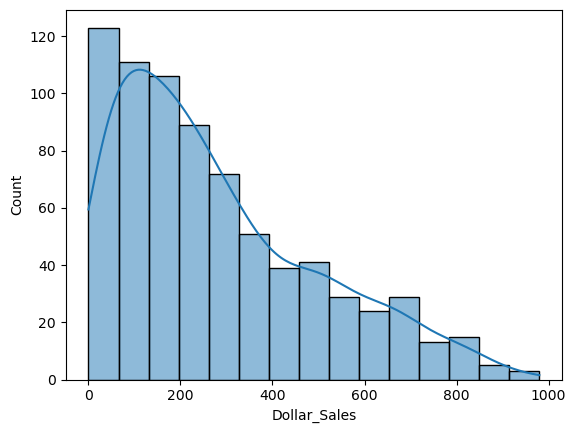

In [68]:
# Checking for outliers using Histogram
import seaborn as sns

sns.histplot(data=sales_df, x = "Dollar_Sales", kde = True)

# *Extracting Weather forecast for Los Angeles to determine whether the weather affects sales in the month on September*

In [69]:
# Extract an API from open-meteo website

import requests
import time
from datetime import datetime

# Getting the maximum temperature for each day in the month of september 2024
url = (
    f"https://historical-forecast-api.open-meteo.com/v1/forecast"
    f"?latitude=34.0522&longitude=-118.2437&start_date=2024-09-01&end_date=2024-09-30&daily=temperature_2m_max&timezone=auto"
)

response = requests.get(url)
response.json()

{'latitude': 34.060257,
 'longitude': -118.23433,
 'generationtime_ms': 21.81994915008545,
 'utc_offset_seconds': -25200,
 'timezone': 'America/Los_Angeles',
 'timezone_abbreviation': 'GMT-7',
 'elevation': 91.0,
 'daily_units': {'time': 'iso8601', 'temperature_2m_max': '°C'},
 'daily': {'time': ['2024-09-01',
   '2024-09-02',
   '2024-09-03',
   '2024-09-04',
   '2024-09-05',
   '2024-09-06',
   '2024-09-07',
   '2024-09-08',
   '2024-09-09',
   '2024-09-10',
   '2024-09-11',
   '2024-09-12',
   '2024-09-13',
   '2024-09-14',
   '2024-09-15',
   '2024-09-16',
   '2024-09-17',
   '2024-09-18',
   '2024-09-19',
   '2024-09-20',
   '2024-09-21',
   '2024-09-22',
   '2024-09-23',
   '2024-09-24',
   '2024-09-25',
   '2024-09-26',
   '2024-09-27',
   '2024-09-28',
   '2024-09-29',
   '2024-09-30'],
  'temperature_2m_max': [30.8,
   31.8,
   32.6,
   33.8,
   41.3,
   42.6,
   37.2,
   40.3,
   40.1,
   32.8,
   29.0,
   26.7,
   27.3,
   27.4,
   23.7,
   23.1,
   24.3,
   25.1,
   23.3,
 

In [70]:
# Passing the response.json() to a variable and calling only the temperature for each day
weather_data = response.json()

weather_data["daily"]["temperature_2m_max"]

[30.8,
 31.8,
 32.6,
 33.8,
 41.3,
 42.6,
 37.2,
 40.3,
 40.1,
 32.8,
 29.0,
 26.7,
 27.3,
 27.4,
 23.7,
 23.1,
 24.3,
 25.1,
 23.3,
 22.9,
 24.2,
 25.7,
 26.7,
 25.0,
 22.7,
 26.1,
 24.7,
 25.0,
 26.5,
 30.5]

In [71]:
url = ( f"https://historical-forecast-api.open-meteo.com/v1/forecast?" 
       f"latitude=34.0522&longitude=-118.2437&start_date=2024-09-01&end_date=2024-09-30&daily=temperature_2m_max&timezone=auto"
) 
response = requests.get(url) 
if response.status_code == 200: 
    weather_data = response.json() 
    
    # Create DataFrame directly from the API response 
    weather_df = pd.DataFrame({ 
        'date': weather_data["daily"]["time"], # dates from API 
        'temp': weather_data["daily"]["temperature_2m_max"] # temperatures from API 
    }) 
    # Convert date column to datetime 
    weather_df['date'] = pd.to_datetime(weather_df['date'])

In [72]:
weather_df

,date,temp
0,2024-09-01,30.8
1,2024-09-02,31.8
2,2024-09-03,32.6
3,2024-09-04,33.8
4,2024-09-05,41.3
5,2024-09-06,42.6
6,2024-09-07,37.2
7,2024-09-08,40.3
8,2024-09-09,40.1
9,2024-09-10,32.8


In [73]:
# I had issues merging the sales data with the weather data, so printed to see where the problem is.
print(sales_df.columns)
print(weather_df.columns)

Index(['Store_Id', 'Store_Name', 'Product_Category', 'Date', 'Unit_Sales',
       'Dollar_Sales', 'Store_Zip', 'Promotion_Flag', 'Revenue_Per_Unit'],
      dtype='object')
Index(['date', 'temp'], dtype='object')


In [74]:
#weather_df = weather_df.rename(columns={"date": "Date"})

In [75]:
sales_df = sales_df.merge(weather_df.rename(columns={"date": "Date"})[["Date", "temp"]], 
                          how="left", on="Date"
)
sales_df

,Store_Id,Store_Name,Product_Category,Date,Unit_Sales,Dollar_Sales,Store_Zip,Promotion_Flag,Revenue_Per_Unit,temp
0,LA002,Store_2,Household,2024-09-01,16,96.28,90004,True,6.02,30.8
1,LA001,Store_1,Beverages,2024-09-01,14,86.63,90004,True,6.19,30.8
2,LA004,Store_4,Produce,2024-09-15,18,298.26,90003,True,16.57,23.7
3,LA003,Store_3,Household,2024-09-07,7,25.69,90001,True,3.67,37.2
4,LA008,Store_8,Beverages,2024-09-18,25,85.46,90005,False,3.42,25.1
...,...,...,...,...,...,...,...,...,...,...
745,LA010,Store_10,Beverages,2024-09-24,46,790.99,90005,True,17.20,25.0
746,LA008,Store_8,Snacks,2024-09-14,23,375.40,90003,False,16.32,27.4
747,LA004,Store_4,Personal Care,2024-09-14,17,225.24,90000,False,13.25,27.4
748,LA009,Store_9,Snacks,2024-09-28,37,406.47,90004,False,10.99,25.0


***
# *LOAD - INTO SQL*
***

In [76]:
sales_df.to_sql("Sales", if_exists = "replace", index = False, con = conn)

750

***
# *Query SQL*
***

In [82]:
pd.read_sql("SELECT * FROM Sales WHERE temp < 30", con = conn)

,Store_Id,Store_Name,Product_Category,Date,Unit_Sales,Dollar_Sales,Store_Zip,Promotion_Flag,Revenue_Per_Unit,temp
0,LA004,Store_4,Produce,2024-09-15 00:00:00,18,298.26,90003,1,16.57,23.7
1,LA008,Store_8,Beverages,2024-09-18 00:00:00,25,85.46,90005,0,3.42,25.1
2,LA004,Store_4,Beverages,2024-09-23 00:00:00,3,41.71,90004,0,13.90,26.7
3,LA005,Store_5,Household,2024-09-15 00:00:00,11,95.30,90001,1,8.66,23.7
4,LA010,Store_10,Snacks,2024-09-21 00:00:00,35,529.35,90000,1,15.12,24.2
...,...,...,...,...,...,...,...,...,...,...
484,LA010,Store_10,Beverages,2024-09-24 00:00:00,46,790.99,90005,1,17.20,25.0
485,LA008,Store_8,Snacks,2024-09-14 00:00:00,23,375.40,90003,0,16.32,27.4
486,LA004,Store_4,Personal Care,2024-09-14 00:00:00,17,225.24,90000,0,13.25,27.4
487,LA009,Store_9,Snacks,2024-09-28 00:00:00,37,406.47,90004,0,10.99,25.0
